<a href="https://colab.research.google.com/github/lightweightcobra/Machine-Learning/blob/main/ADITYA_KUMAR_CS_IT308_LAB_4_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2023-24 </center>
## <center> CS/IT 308, CS 652, CS8XX Machine Learning Lab </center>
## <center> Lab#4 MMSE and Linear regression</center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio

## <font color='blue'> MMSE

---

Refer class note



## <font color='red'> 1. Find the minimum mean squared error (MMSE) on following data.

In [ ]:
y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]

sum = 0
for i in range(len(y)):
  sum += (y[i] - y_bar[i])**2

print(sum/len(y))



1.45


## <font color='red'> 2 Given a sample space $S_{XY}={(0,0),(1,1),(2,2),(2,3)}$, with equiprobable outcomes, i.e., $p(0,0)=p(1,1)=p(2,2)=p(2,3)=\frac{1}{4}$. Estimate $\hat{Y}$ given X.


$$\hat{Y}=E(Y)+\frac{COV(X,Y)}{VAR(X)}(X-E(X))$$

Also calculate the mean squared error between $\hat{Y}$ and $Y$.


Hint: You can use the classnotes for help.

In [ ]:


# Code here
x = [0, 1, 2, 2]
y = [0, 1, 2, 3]
y_hat = []
# find E(x)
Ex = 0
for i in range(len(x)):
  Ex += x[i]

Ex/= len(x)
print("E(x):",Ex)
# Find E(y)
Ey = 0
for i in range(len(y)):
  Ey += y[i]

Ey/= len(y)
print("E(y):",Ey)
#Find E(x^2)
Ex2 = 0
for i in range(len(x)):
  Ex2 += x[i]**2
Ex2/=len(x)
print("E(x^2):",Ex2)
var_x = Ex2 - Ex**2
print(var_x)

Exy = 0

for i in range(len(x)):
  Exy += x[i]*y[i]
Exy /= len(x)

print("E(xy):",Exy)

Cov_xy = Exy -Ex*Ey
print("Cov(x,y):",Cov_xy)

for i in range(len(x)):
  num = Ey + (Cov_xy*(x[i]-Ex))/var_x
  y_hat.append(num)

print(y_hat)

def find_MSE(y, y_hat):
  sum = 0
  for i in range(len(y)):
    sum += (y[i] - y_hat[i])**2
  sum /= len(y)
  return sum


print("X | Y | Y_hat")
print("  |   |")
for i in range(len(x)):
    print(f"{x[i]} | {y[i]} | {y_hat[i]}")
print()
mse = find_MSE(y, y_hat)
print("MSE of Y and Y_hat is:", mse)


E(x): 1.25
E(y): 1.5
E(x^2): 2.25
0.6875
E(xy): 2.75
Cov(x,y): 0.875
[-0.09090909090909083, 1.1818181818181819, 2.4545454545454546, 2.4545454545454546]
X | Y | Y_hat
  |   |
0 | 0 | -0.09090909090909083
1 | 1 | 1.1818181818181819
2 | 2 | 2.4545454545454546
2 | 3 | 2.4545454545454546

MSE of Y and Y_hat is: 0.13636363636363635


## <font color='blue'> Linear regression

---

Refer class note



## <font color='red'> 3. Perform linear regression on the given dataset and observe underfitting and overfitting capacity of the function.

In [ ]:
#example of dataset:

no_samples = 10

#Generate n = np.random.rand(no_samples) # Here data is zero mean
n = np.random.rand(no_samples)
print(n)
#Generate x between 0 and 2 using number of smaples
x = np.linspace(0, 2, 10)
print(x)

#Generate function y dependent on x and n: y = x**2+2*n
def generate_y(x, n):
    y = x**2 + 2*n
    return y


y = generate_y(x, n)
print(y)

[0.4118538  0.80114322 0.6898947  0.31352827 0.96840232 0.4180438
 0.45432252 0.39217939 0.33919112 0.55913049]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[0.82370761 1.65166916 1.57732026 1.07150098 2.72692809 2.0706555
 2.68642281 3.20411186 3.83887606 5.11826098]


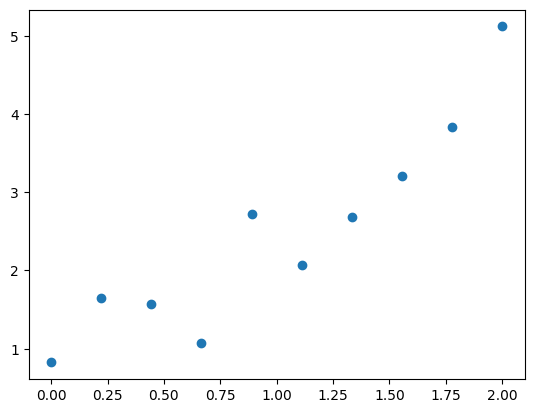

In [ ]:
# code to scatter plot x and y
plt.scatter(x,y)

#### Hint: Pseudo inverse
 $$Y = W^TX$$
 $$W = (X^TX)^{-1}X^TY$$

1. Take $y = \theta_0 + \theta_1 x$

In [ ]:
#Generate X1 by concatinating ones and x as shown in output
X1 = np.column_stack((np.ones_like(x), x))
W1 = la.pinv(X1)@y
#Find W1 using pseudo inverse
print(X1)
print(W1)

[[1.         0.        ]
 [1.         0.22222222]
 [1.         0.44444444]
 [1.         0.66666667]
 [1.         0.88888889]
 [1.         1.11111111]
 [1.         1.33333333]
 [1.         1.55555556]
 [1.         1.77777778]
 [1.         2.        ]]
[0.66920316 1.80774217]


2. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4+\theta_5 x^5$

In [ ]:
#Generate X2 by concatinating ones,x,x**2,x**3,x**4,x**5
# X2 = np.column_stack((np.ones(no_samples), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13, x**14, x**15, x**16, x**17,x**18,
#                       x**19, x**20, x**21, x**22, x**23, x**24, x**25, x**26, x**27, x**28, x**29, x**30, x**31, x**32, x**33, x**34, x**35, x**36,
#                       x**37, x**38, x**39, x**40, x**41, x**42, x**43, x**44, x**45, x**46, x**47, x**48, x**49))
X2 = np.column_stack((np.ones(no_samples), x, x**2, x**3, x**4, x**5))
#Generate W2 using: W2= la.inv(X2.T@X2)@X2.T@y
W2 = la.pinv(X2)@y
print(X2)
print(W2)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e-01
  1.97530864e-01 1.31687243e-01]
 [1.00000000e+00 8.88888889e-01 7.90123457e-01 7.02331962e-01
  6.24295077e-01 5.54928957e-01]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00 1.37174211e+00
  1.52415790e+00 1.69350878e+00]
 [1.00000000e+00 1.33333333e+00 1.77777778e+00 2.37037037e+00
  3.16049383e+00 4.21399177e+00]
 [1.00000000e+00 1.55555556e+00 2.41975309e+00 3.76406036e+00
  5.85520500e+00 9.10809667e+00]
 [1.00000000e+00 1.77777778e+00 3.16049383e+00 5.61865569e+00
  9.98872123e+00 1.77577266e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01]]
[  0.87325123   5.51873195 -16.54634921  22.17368

3. Take $y = \theta_0 + \theta_1 x + \theta_2 x^2 $

In [ ]:
#Generate X3 by concatinating ones,x,x**2
X3 = np.column_stack((np.ones(no_samples), x, x**2))

#Generate W3 using: W2= la.inv(X3.T@X3)@X3.T@y
W3= la.inv(X3.T@X3)@X3.T@y
print(X3)
print(W3)

[[1.         0.         0.        ]
 [1.         0.22222222 0.04938272]
 [1.         0.44444444 0.19753086]
 [1.         0.66666667 0.44444444]
 [1.         0.88888889 0.79012346]
 [1.         1.11111111 1.2345679 ]
 [1.         1.33333333 1.77777778]
 [1.         1.55555556 2.41975309]
 [1.         1.77777778 3.16049383]
 [1.         2.         4.        ]]
[1.18681062 0.06081699 0.87346259]


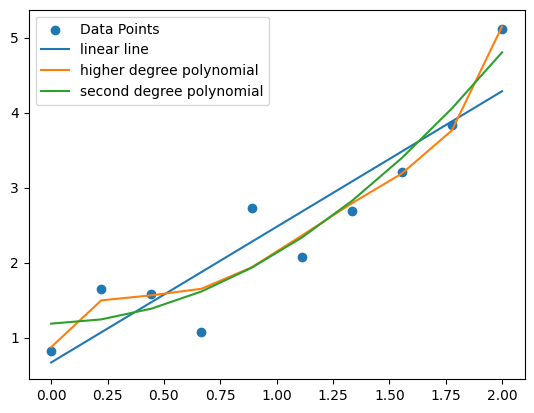

In [ ]:

#Generate y_p1 = X1@W1
y_p1 = X1@W1

#Generate y_p2 = X2@W2
y_p2 = X2@W2

#Generate y_p3 = X3@W3
y_p3 = X3@W3

ax = plt.scatter(x, y)
#Plot x,y_p1
ax = plt.plot(x,y_p1)
#plot x,y_p2
ax = plt.plot(x, y_p2)
#plot x,y_p3
ax = plt.plot(x, y_p3)

plt.legend(["Data Points","linear line", "higher degree polynomial", "second degree polynomial"])
plt.show()